In [ ]:
# Written By: Dr. Sezer, Hayri
# https://www.linkedin.com/search/results/all/?fetchDeterministicClustersOnly=true&heroEntityKey=urn%3Ali%3Amember%3A16891543&keywords=hayri%20sezer&origin=RICH_QUERY_TYPEAHEAD_HISTORY&position=0&sid=mYu&spellCorrectionEnabled=false


In [5]:
using Plots

In [1]:
# Function to solve dy/dt = y using Explicit Euler
function explicit_euler(dt, t_end, y0)
    t = 0:dt:t_end
    y = zeros(length(t))
    y[1] = y0
    for i in 1:length(t)-1
        y[i+1] = y[i] + dt * y[i]
    end
    return t, y
end

explicit_euler (generic function with 1 method)

In [2]:
# Function to solve dy/dt = y using Implicit Euler
function implicit_euler(dt, t_end, y0)
    t = 0:dt:t_end
    y = zeros(length(t))
    y[1] = y0
    for i in 1:length(t)-1
        y[i+1] = y[i] / (1 - dt)
    end
    return t, y
end

implicit_euler (generic function with 1 method)

In [3]:
# Analytical solution
function analytical_solution(dt, t_end, y0)
    t = 0:dt:t_end
    y = y0 .* exp.(t)
    return t, y
end

analytical_solution (generic function with 1 method)

t	Analytical	Explicit Euler	Implicit Euler
0.0	0.5	0.5	0.5
0.1	0.5525854590378239	0.55	0.5555555555555556
0.2	0.6107013790800849	0.6050000000000001	0.6172839506172839
0.3	0.6749294037880016	0.6655000000000001	0.6858710562414265
0.4	0.7459123488206352	0.7320500000000001	0.7620789513793628
0.5	0.8243606353500641	0.805255	0.8467543904215141
0.6	0.9110594001952544	0.8857805000000001	0.9408382115794601
0.7	1.0068763537352383	0.97435855	1.0453757906438446
0.8	1.112770464246234	1.0717944050000001	1.1615286562709384
0.9	1.229801555578475	1.1789738455	1.290587395856598
1.0	1.3591409142295225	1.29687123005	1.4339859953962202


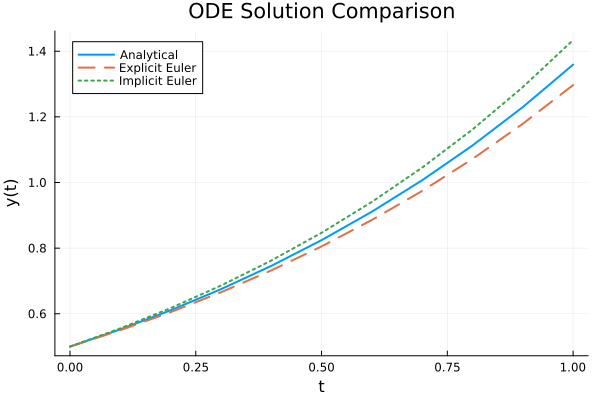

In [6]:
t_end = 1.0
y0 = 0.5
dt = 0.1

# Solve using explicit Euler
t_explicit, y_explicit = explicit_euler(dt, t_end, y0)

# Solve using implicit Euler
t_implicit, y_implicit = implicit_euler(dt, t_end, y0)

# Analytical solution
t_analytical, y_analytical = analytical_solution(dt, t_end, y0)

# Print results
println("t\tAnalytical\tExplicit Euler\tImplicit Euler")
for i in 1:length(t_analytical)
    println("$(t_analytical[i])\t$(y_analytical[i])\t$(y_explicit[i])\t$(y_implicit[i])")
end

    # Plot results
plot(t_analytical, y_analytical, label="Analytical", lw=2)
plot!(t_explicit, y_explicit, label="Explicit Euler", lw=2, linestyle=:dash)
plot!(t_implicit, y_implicit, label="Implicit Euler", lw=2, linestyle=:dot)
xlabel!("t")
ylabel!("y(t)")
title!("ODE Solution Comparison")